In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
from geopy.geocoders import Nominatim
import geopy.distance
geolocator = Nominatim()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

# Collecting data


In [ ]:
position = pd.ExcelFile("/content/drive/MyDrive/colab/tambon.xlsx").parse("TAMBON")
school = pd.ExcelFile("/content/drive/MyDrive/colab/school.xlsx").parse("ExportSchool ")

#Cleaning Data

In [ ]:
print(position.head())
print(position.tail())
print(school.head())
print(school.tail())

   AD_LEVEL     TA_ID        TAMBON_T   TAMBON_E   AM_ID       AMPHOE_T  \
0       4.0  910106.0  ต. เกาะสาหร่าย   Ko Sarai  9101.0            NaN   
1       4.0  210114.0     ต. มาบตาพุด  Maptaphut  2101.0  อ. เมืองระยอง   
2       4.0  210114.0     ต. มาบตาพุด  Maptaphut  2101.0  อ. เมืองระยอง   
3       4.0  210114.0     ต. มาบตาพุด  Maptaphut  2101.0  อ. เมืองระยอง   
4       4.0  210114.0     ต. มาบตาพุด  Maptaphut  2101.0  อ. เมืองระยอง   

        AMPHOE_E  CH_ID CHANGWAT_T CHANGWAT_E     LAT     LONG  
0   Mueang Satun   91.0    จ. สตูล      Satun   6.546   99.706  
1  Mueang Rayong   21.0   จ. ระยอง     Rayong  12.646  101.171  
2  Mueang Rayong   21.0   จ. ระยอง     Rayong  12.645  101.170  
3  Mueang Rayong   21.0   จ. ระยอง     Rayong  12.649  101.174  
4  Mueang Rayong   21.0   จ. ระยอง     Rayong  12.644  101.169  
      AD_LEVEL     TA_ID       TAMBON_T     TAMBON_E   AM_ID       AMPHOE_T  \
7763       4.0  710803.0      ต. ไล่โว่       Lai Wo  7108.0  อ. สังขละบุรี   
7

In [ ]:
position.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768 entries, 0 to 7767
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AD_LEVEL    7768 non-null   float64
 1   TA_ID       7768 non-null   float64
 2   TAMBON_T    7768 non-null   object 
 3   TAMBON_E    7495 non-null   object 
 4   AM_ID       7768 non-null   float64
 5   AMPHOE_T    7767 non-null   object 
 6   AMPHOE_E    7768 non-null   object 
 7   CH_ID       7768 non-null   float64
 8   CHANGWAT_T  7768 non-null   object 
 9   CHANGWAT_E  7768 non-null   object 
 10  LAT         7768 non-null   float64
 11  LONG        7768 non-null   float64
dtypes: float64(6), object(6)
memory usage: 728.4+ KB


In [ ]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46259 entries, 0 to 46258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SchoolID     46259 non-null  float64
 1   SchoolName   46259 non-null  object 
 2   SubDistrict  46259 non-null  object 
 3   District     46259 non-null  object 
 4   Province     46259 non-null  object 
 5   PostCode     46259 non-null  object 
 6   SchoolType   34822 non-null  object 
 7   Department   46259 non-null  object 
 8   Telephone    46259 non-null  object 
 9   Fax          46259 non-null  object 
 10  Website      46259 non-null  object 
 11  Email        46255 non-null  object 
 12  LAT          46259 non-null  object 
 13  LONG         46253 non-null  object 
dtypes: float64(1), object(13)
memory usage: 4.9+ MB


In [ ]:
def ISFLOAT(x) :
    try:
        float(x)
    except:
        return False
    return True
def ISIN(x,y) :
    return x in y
def isinthai(x,y):
    st = str(x)+", "+str(y)
    location = geolocator.reverse(st)
    if location.raw['address']['country'] == 'ประเทศไทย':
        return True
    else :
        return False

In [ ]:
position = position.replace("ต. ","ตำบล",regex=True)
position = position.replace("เขต ","",regex=True)
position = position.replace("จ. ","",regex=True)
position = position.drop(columns=["TAMBON_E","AM_ID","TA_ID","AD_LEVEL","AMPHOE_E","CH_ID","CHANGWAT_E"])
position = position.sort_values(by = 'TAMBON_T')
position = position.drop_duplicates()
position.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7768 entries, 2504 to 2021
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAMBON_T    7768 non-null   object 
 1   AMPHOE_T    7767 non-null   object 
 2   CHANGWAT_T  7768 non-null   object 
 3   LAT         7768 non-null   float64
 4   LONG        7768 non-null   float64
dtypes: float64(2), object(3)
memory usage: 364.1+ KB


In [ ]:
school = school.drop(columns=["SchoolID","SubDistrict","District","PostCode","Department","Telephone","Fax","Website","Email"])
#school = school.replace("-",np.nan,)
#school = school.dropna()
school = school[school.Province != '-']
school = school[school.Province != 'ค่าว่าง']
school = school.replace(np.nan,'โรงเรียนสังกัด สช. ประเภทสามัญศึกษา')
school = school[(school["LAT"] != "-") & (school["LONG"] != "-")]
school = school[school.LONG.copy().apply(lambda x:ISFLOAT(x))]
school = school[school.LAT.copy().apply(lambda x:ISFLOAT(x))]
school = school[school.LONG.notna()]
#school = school[school.apply(lambda x:isinthai(x.LAT,x.LONG) , axis = 1)]
school = school.drop_duplicates(subset="SchoolName")
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35361 entries, 0 to 45851
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SchoolName  35361 non-null  object
 1   Province    35361 non-null  object
 2   SchoolType  35361 non-null  object
 3   LAT         35361 non-null  object
 4   LONG        35361 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


#EDA


In [ ]:
normaltypels = ['โรงเรียนสังกัด สช. ประเภทสามัญศึกษา','โรงเรียนสาธิตมหาวิทยาลัย','โรงเรียนสังกัด สพฐ. ประเภทสามัญศึกษา','โรงเรียนมหิดลวิทยานุสรณ์']
normalschool = school[school.SchoolType.copy().apply(lambda x:ISIN(x,normaltypels))]
universityls = ['สถาบันอุดมศึกษาของรัฐ','สถาบันอุดมศึกษาของเอกชน']
university = school[school.SchoolType.copy().apply(lambda x:ISIN(x,universityls))]
temp = normaltypels
temp.extend(universityls)
temp = list(set(school.SchoolType.unique()) - set(temp))
school = school.replace(np.nan,'โรงเรียนสังกัด สช. ประเภทสามัญศึกษา')
temp.remove(temp[0])
otherschool = school[school.SchoolType.copy().apply(lambda x:ISIN(x,temp))]


print(normalschool.info())
print(university.info())
print(otherschool.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27779 entries, 0 to 38404
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SchoolName  27779 non-null  object
 1   Province    27779 non-null  object
 2   SchoolType  27779 non-null  object
 3   LAT         27779 non-null  object
 4   LONG        27779 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 4593 to 4912
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SchoolName  113 non-null    object
 1   Province    113 non-null    object
 2   SchoolType  113 non-null    object
 3   LAT         113 non-null    object
 4   LONG        113 non-null    object
dtypes: object(5)
memory usage: 5.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7349 entries, 596 to 45851
Data columns (total 5 columns):
 #   Column      Non-Null

<BarContainer object of 77 artists>

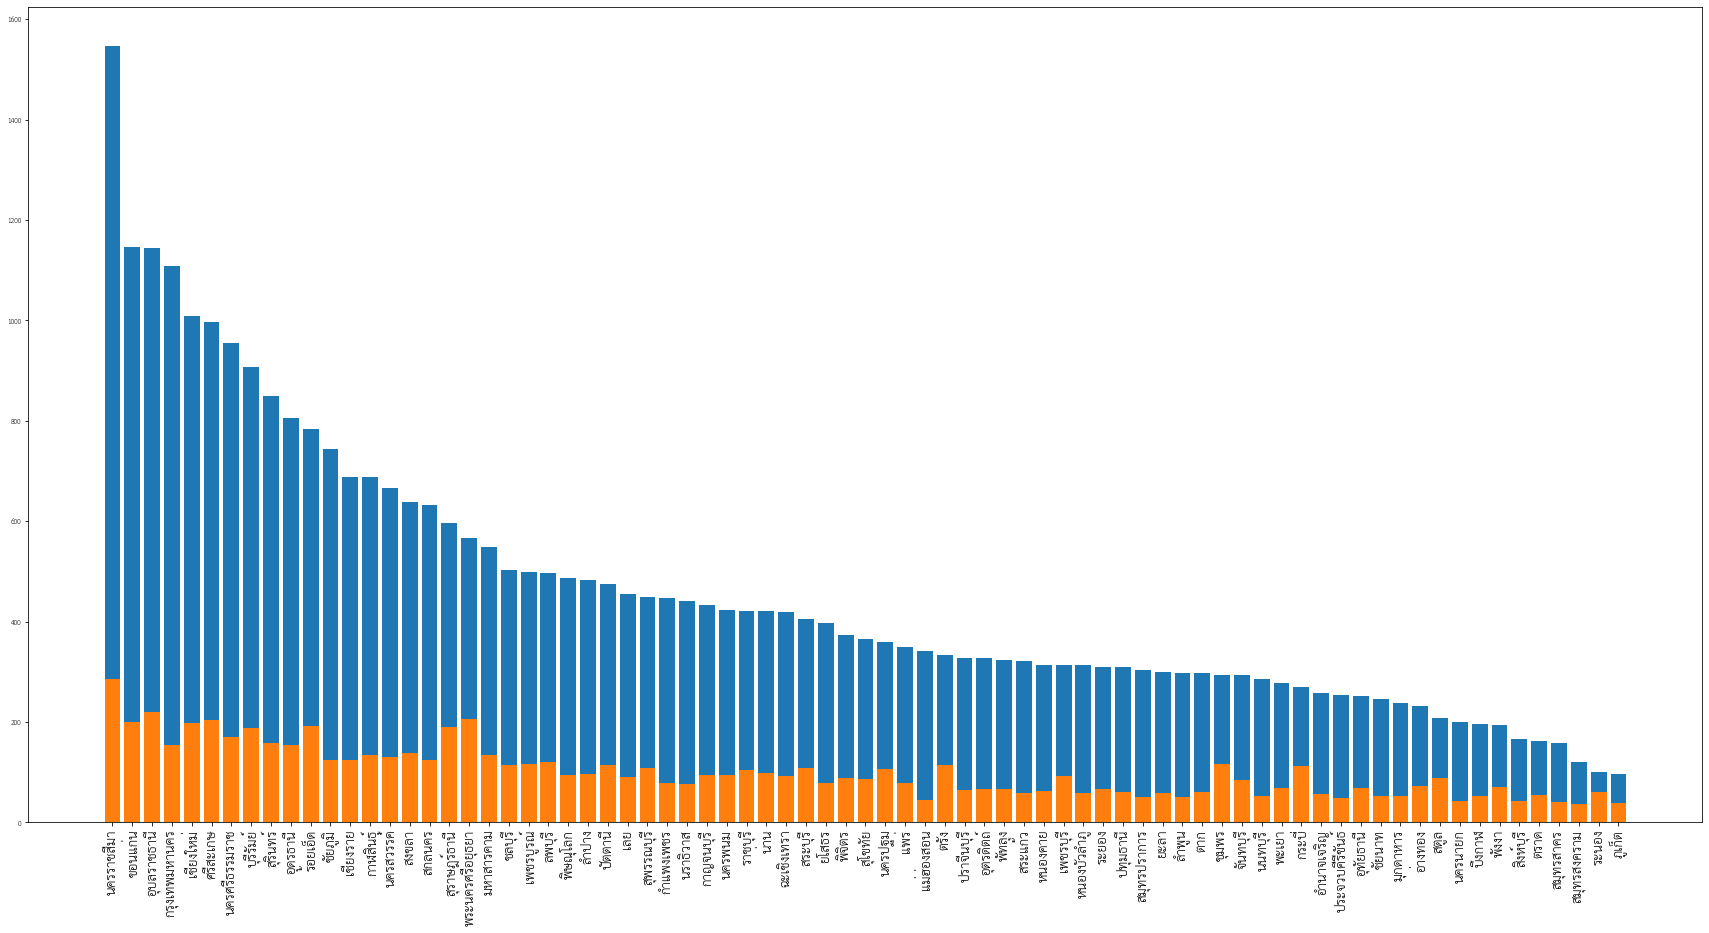

In [ ]:
tambonpositioncount = (list(zip(position.CHANGWAT_T.value_counts().index,position.CHANGWAT_T.value_counts())))
provinceschoolcount = (list(zip(school.Province.value_counts().index,school.Province.value_counts())))

for i in range(len(provinceschoolcount)):
    provinceschoolcount[i] = list(provinceschoolcount[i])
    provinceschoolcount[i].append(0)
    provinceschoolcount[i].append(0)
    for j in range(len(tambonpositioncount)):
        if provinceschoolcount[i][0] == tambonpositioncount[j][0]:
           provinceschoolcount[i][2] = tambonpositioncount[j][1]
           provinceschoolcount[i][3] = provinceschoolcount[i][1]/tambonpositioncount[j][1]
           break
        else:
            provinceschoolcount[i][2] = 0
provinceschoolcount = np.array(provinceschoolcount)
plt.figure(figsize=(30,15))
plt.xticks(fontsize=20,rotation = 90)
#print(provinceschoolcount)
plt.bar(provinceschoolcount[:,0],provinceschoolcount[:,1].astype(int))
plt.bar(provinceschoolcount[:,0],provinceschoolcount[:,2].astype(int))

35361

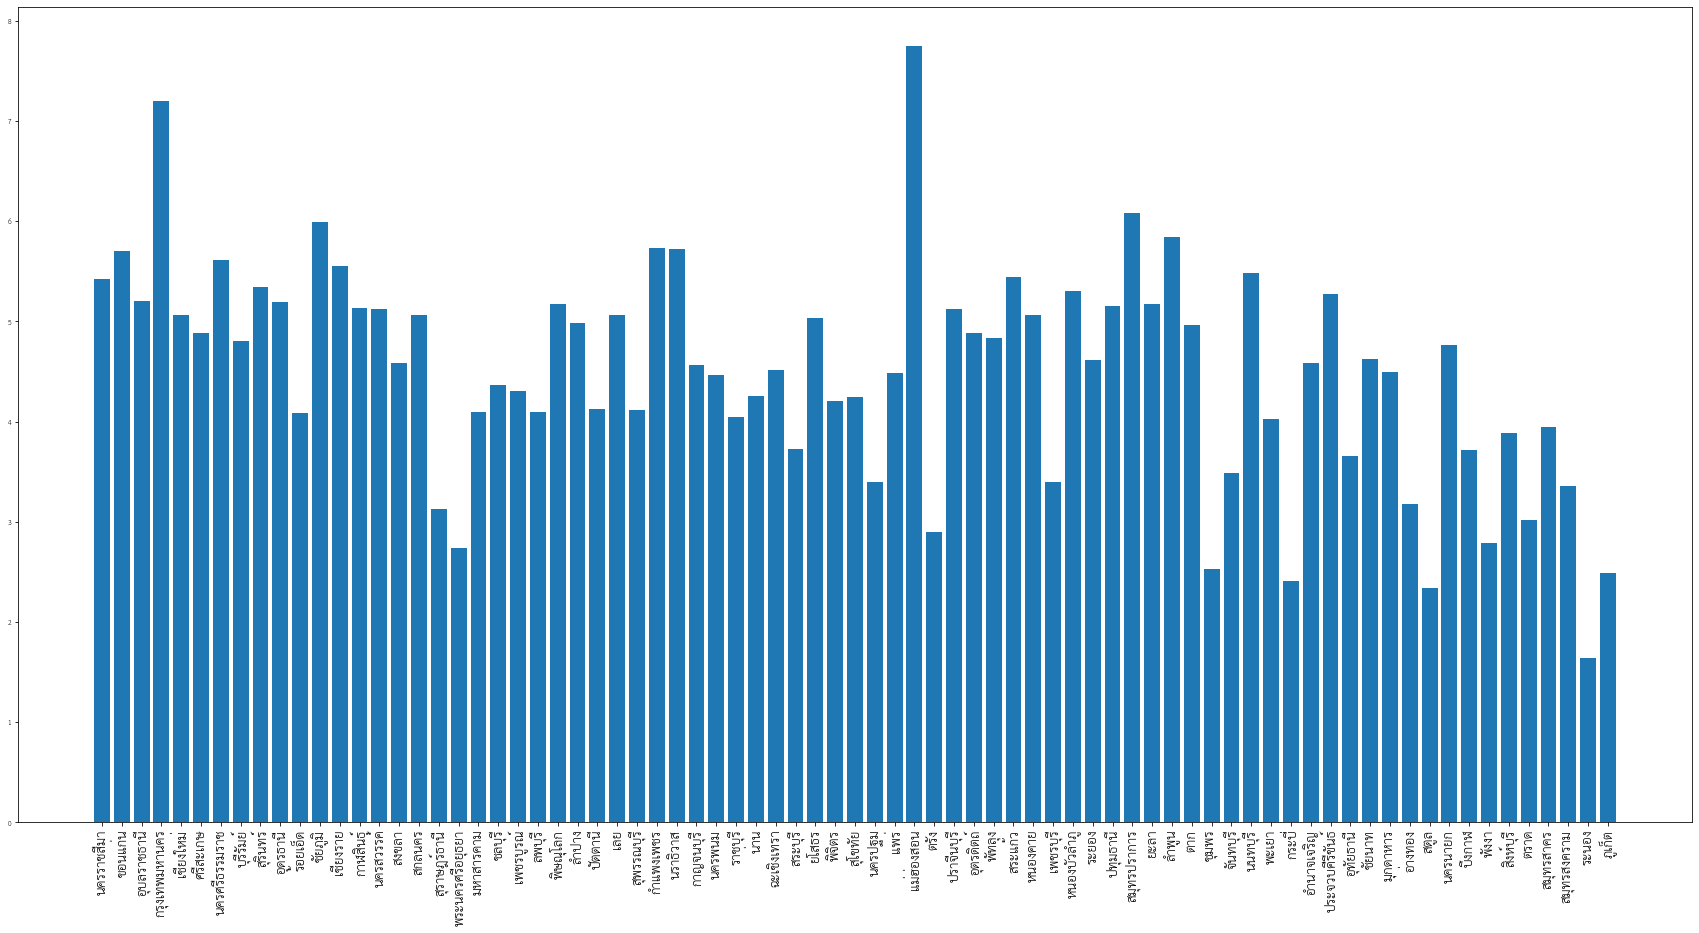

In [ ]:

plt.figure(figsize=(30,15))
plt.xticks(fontsize=20,rotation = 90)
plt.bar(provinceschoolcount[:,0],provinceschoolcount[:,1].astype(int)/provinceschoolcount[:,2].astype(int))
da = pd.DataFrame(provinceschoolcount)
da[3] = pd.to_numeric(da[3])
da = da.sort_values(by = 3)
da[2] = pd.to_numeric(da[2])
da[1] = pd.to_numeric(da[1])
da.rename(columns = {0:"province"}, inplace = True)
da.rename(columns = {1:"school"}, inplace = True)
da.rename(columns = {2:"tambon"}, inplace = True)
da.rename(columns = {3:"schoolpertambon"}, inplace = True)
da.school.sum()

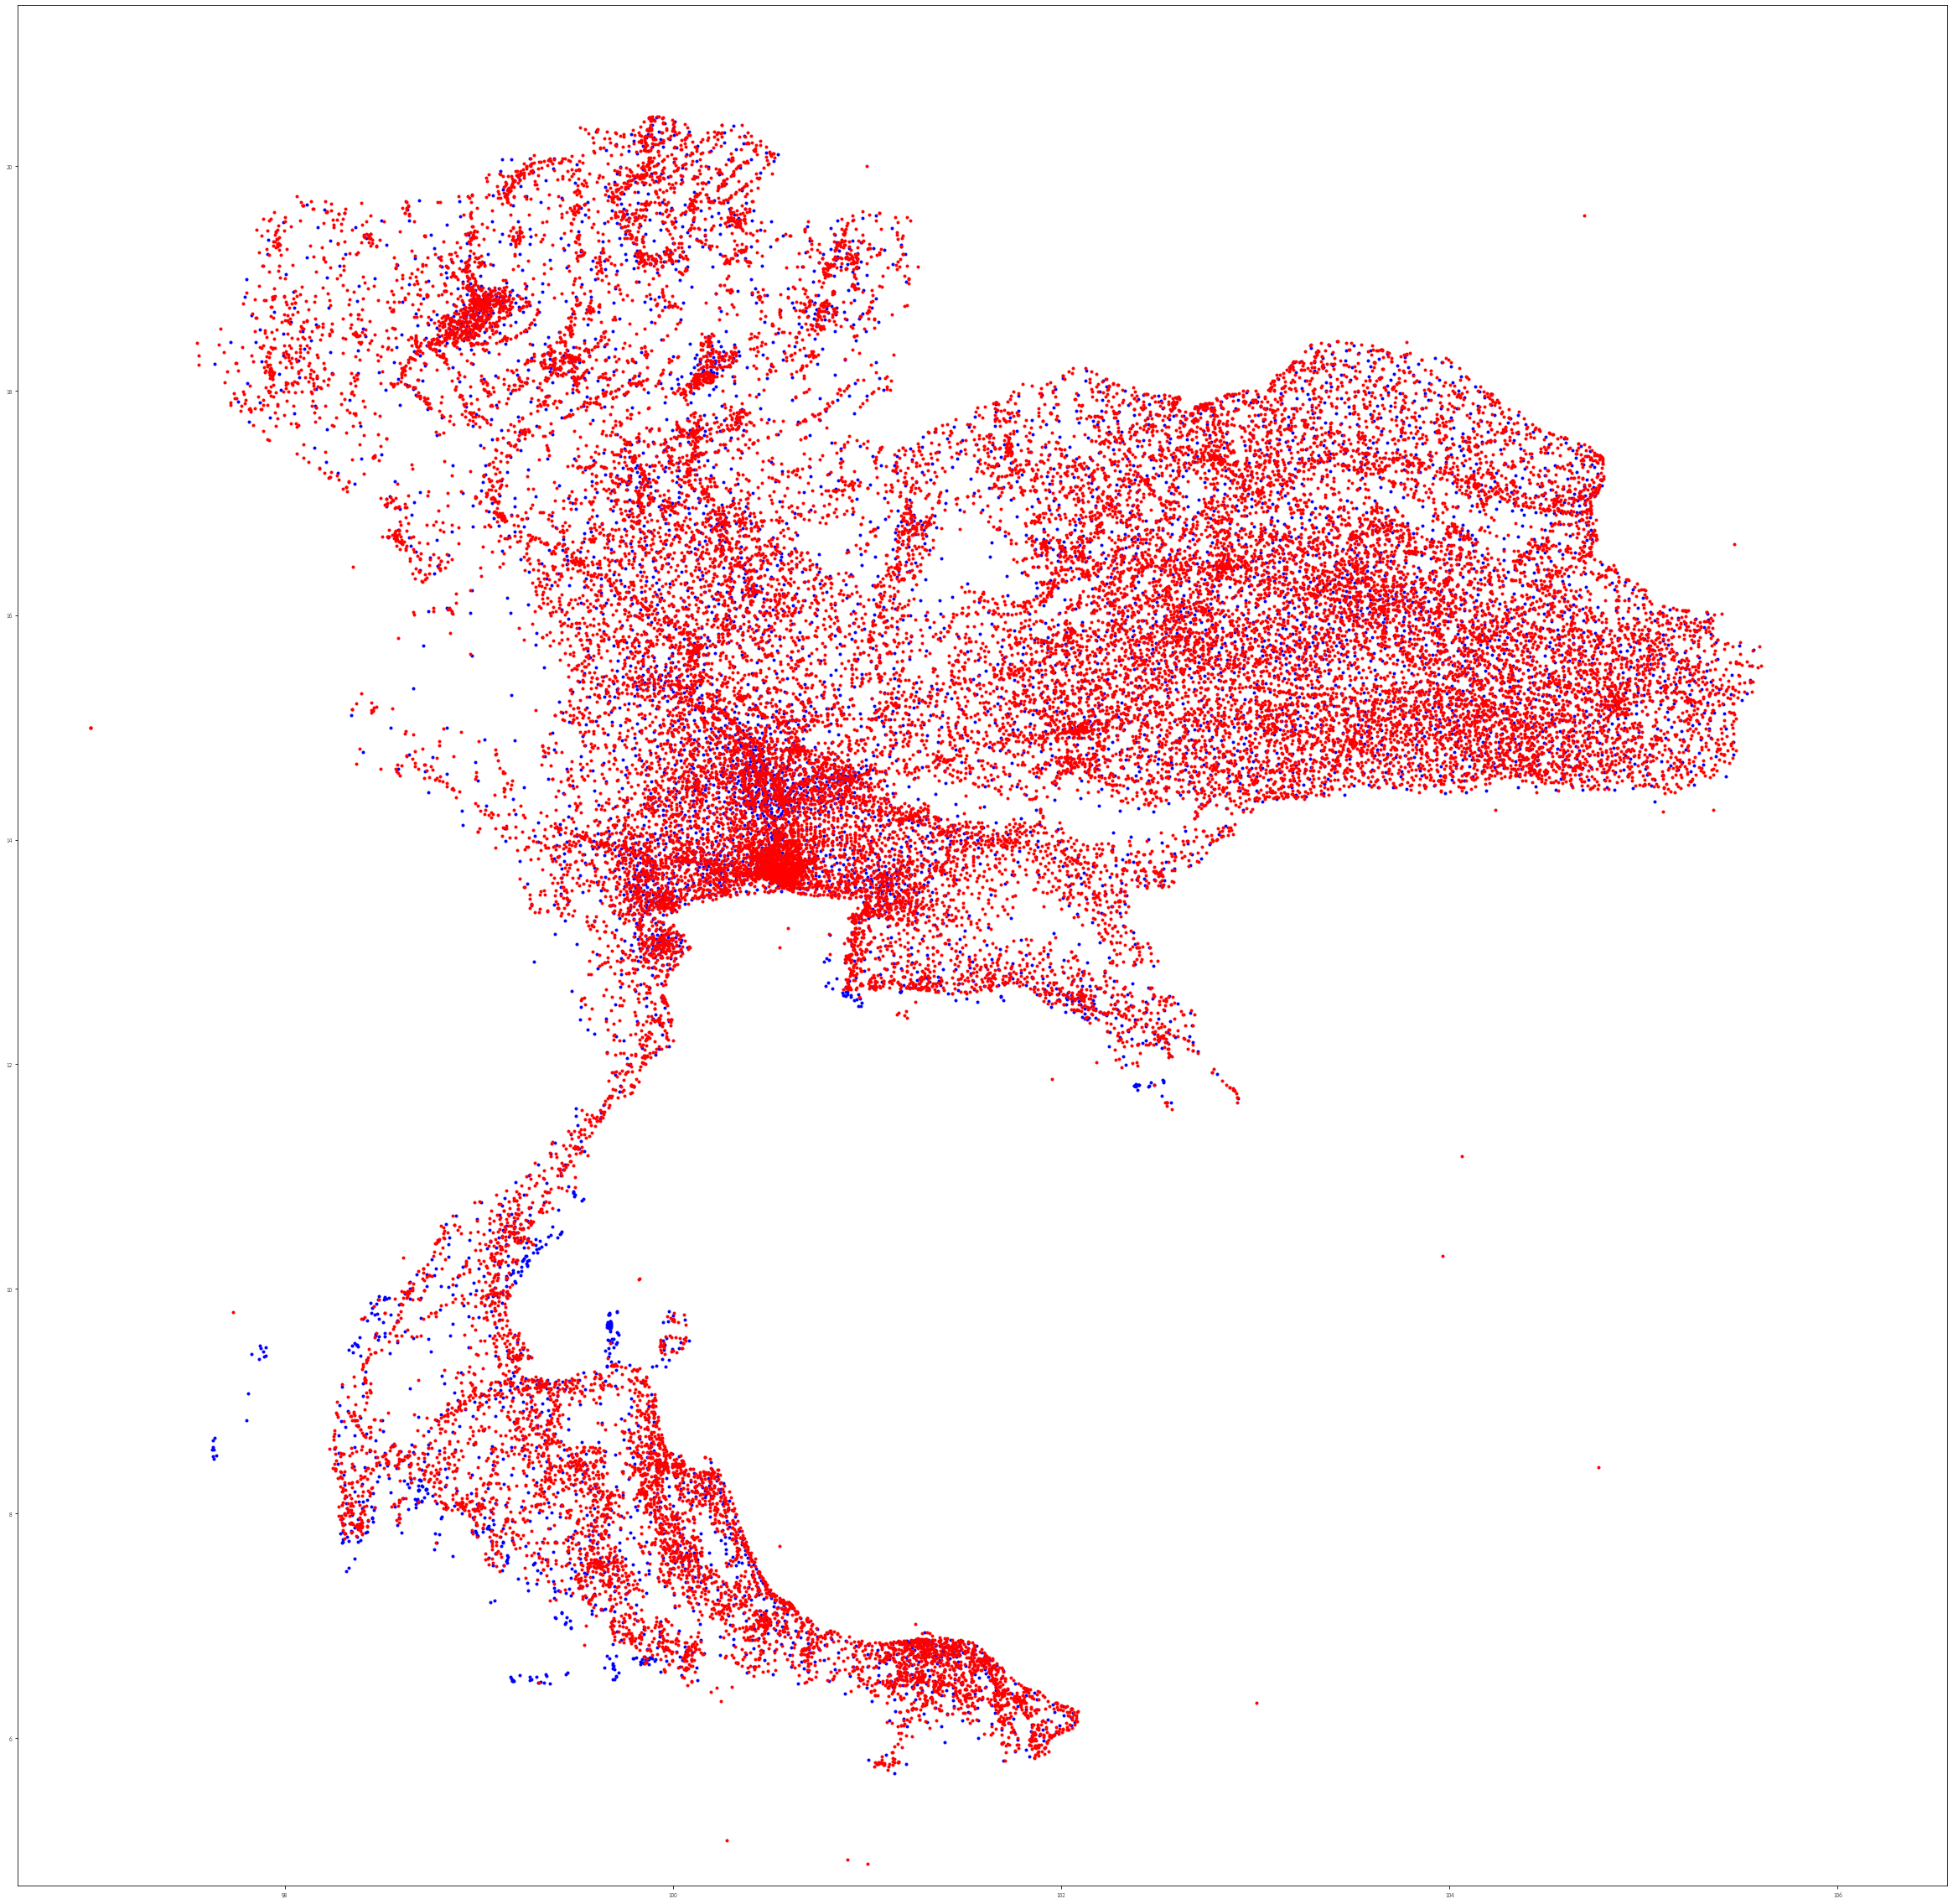

In [ ]:
plt.figure(figsize=(20.625*2,20.625*2))
plt.xlim(97.626-1,105.565+1)
plt.ylim(5.686-1,20.431+1)
plt.plot(position.LONG,position.LAT,"b.")
plt.plot(school.LONG,school.LAT,"r.");


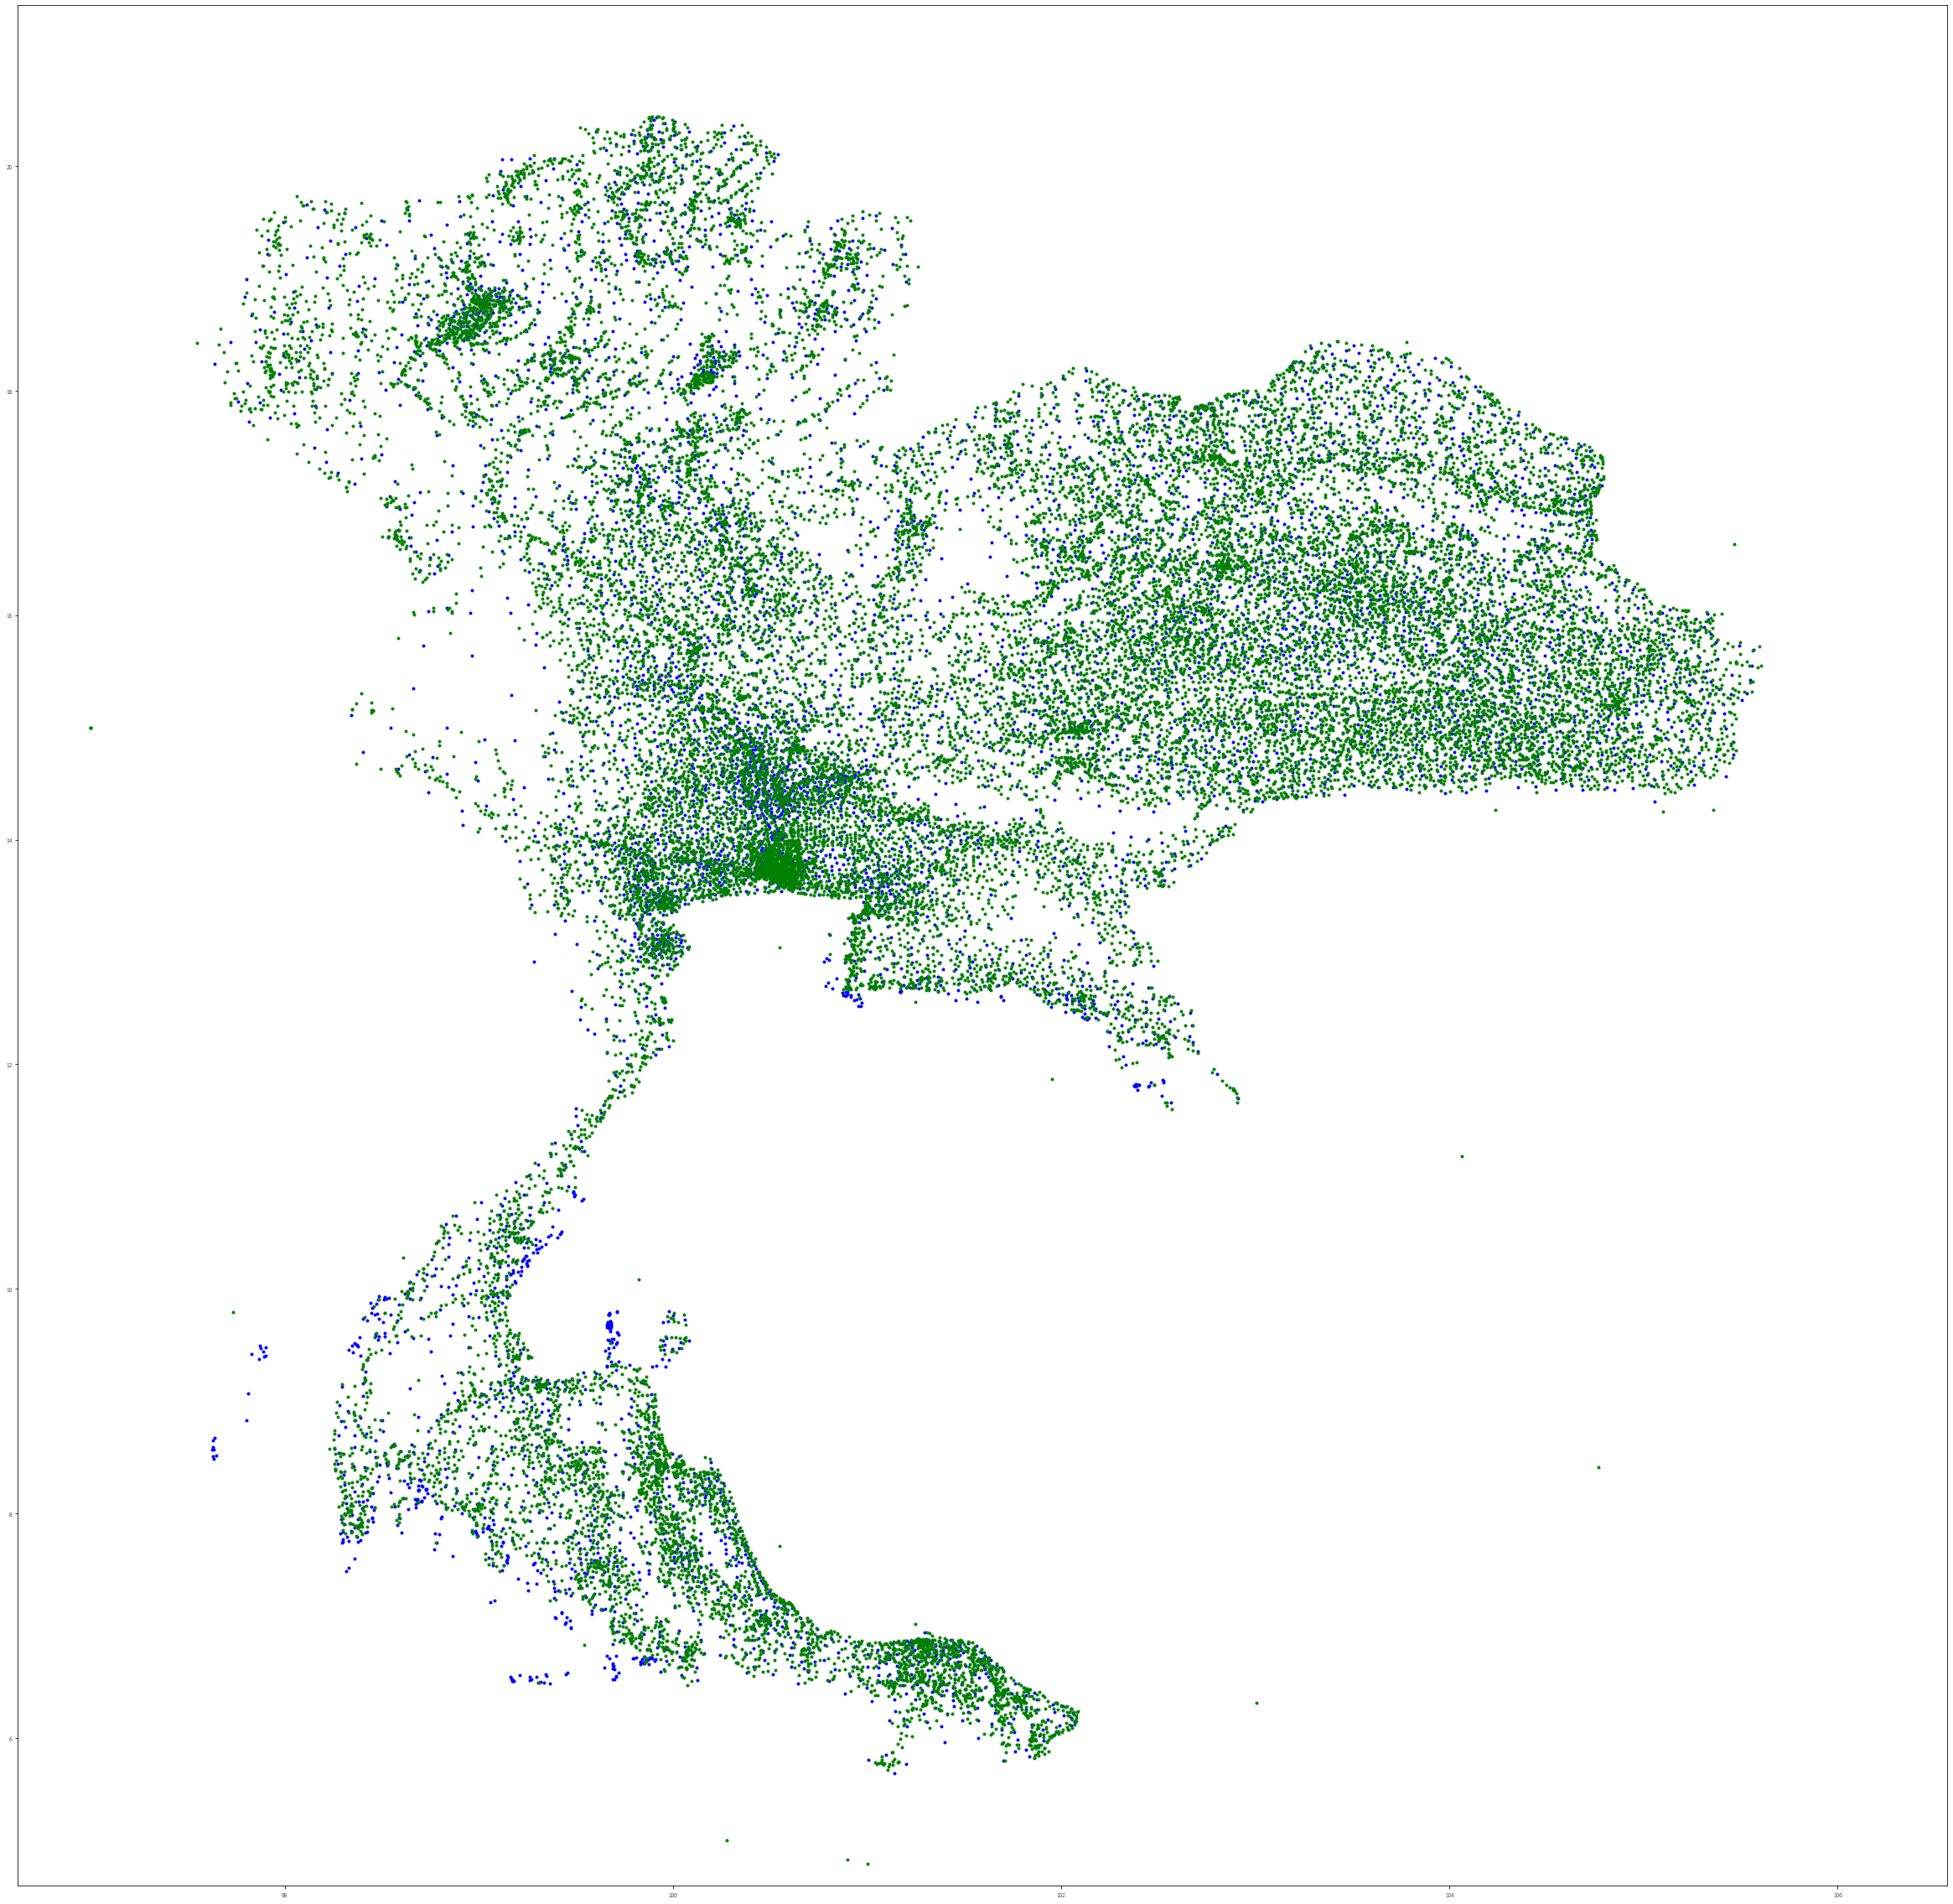

In [ ]:
plt.figure(figsize=(20.625*2,20.625*2))
plt.xlim(97.626-1,105.565+1)
plt.ylim(5.686-1,20.431+1)
plt.plot(position.LONG,position.LAT,"b.")
plt.plot(normalschool.LONG,normalschool.LAT,"g.")

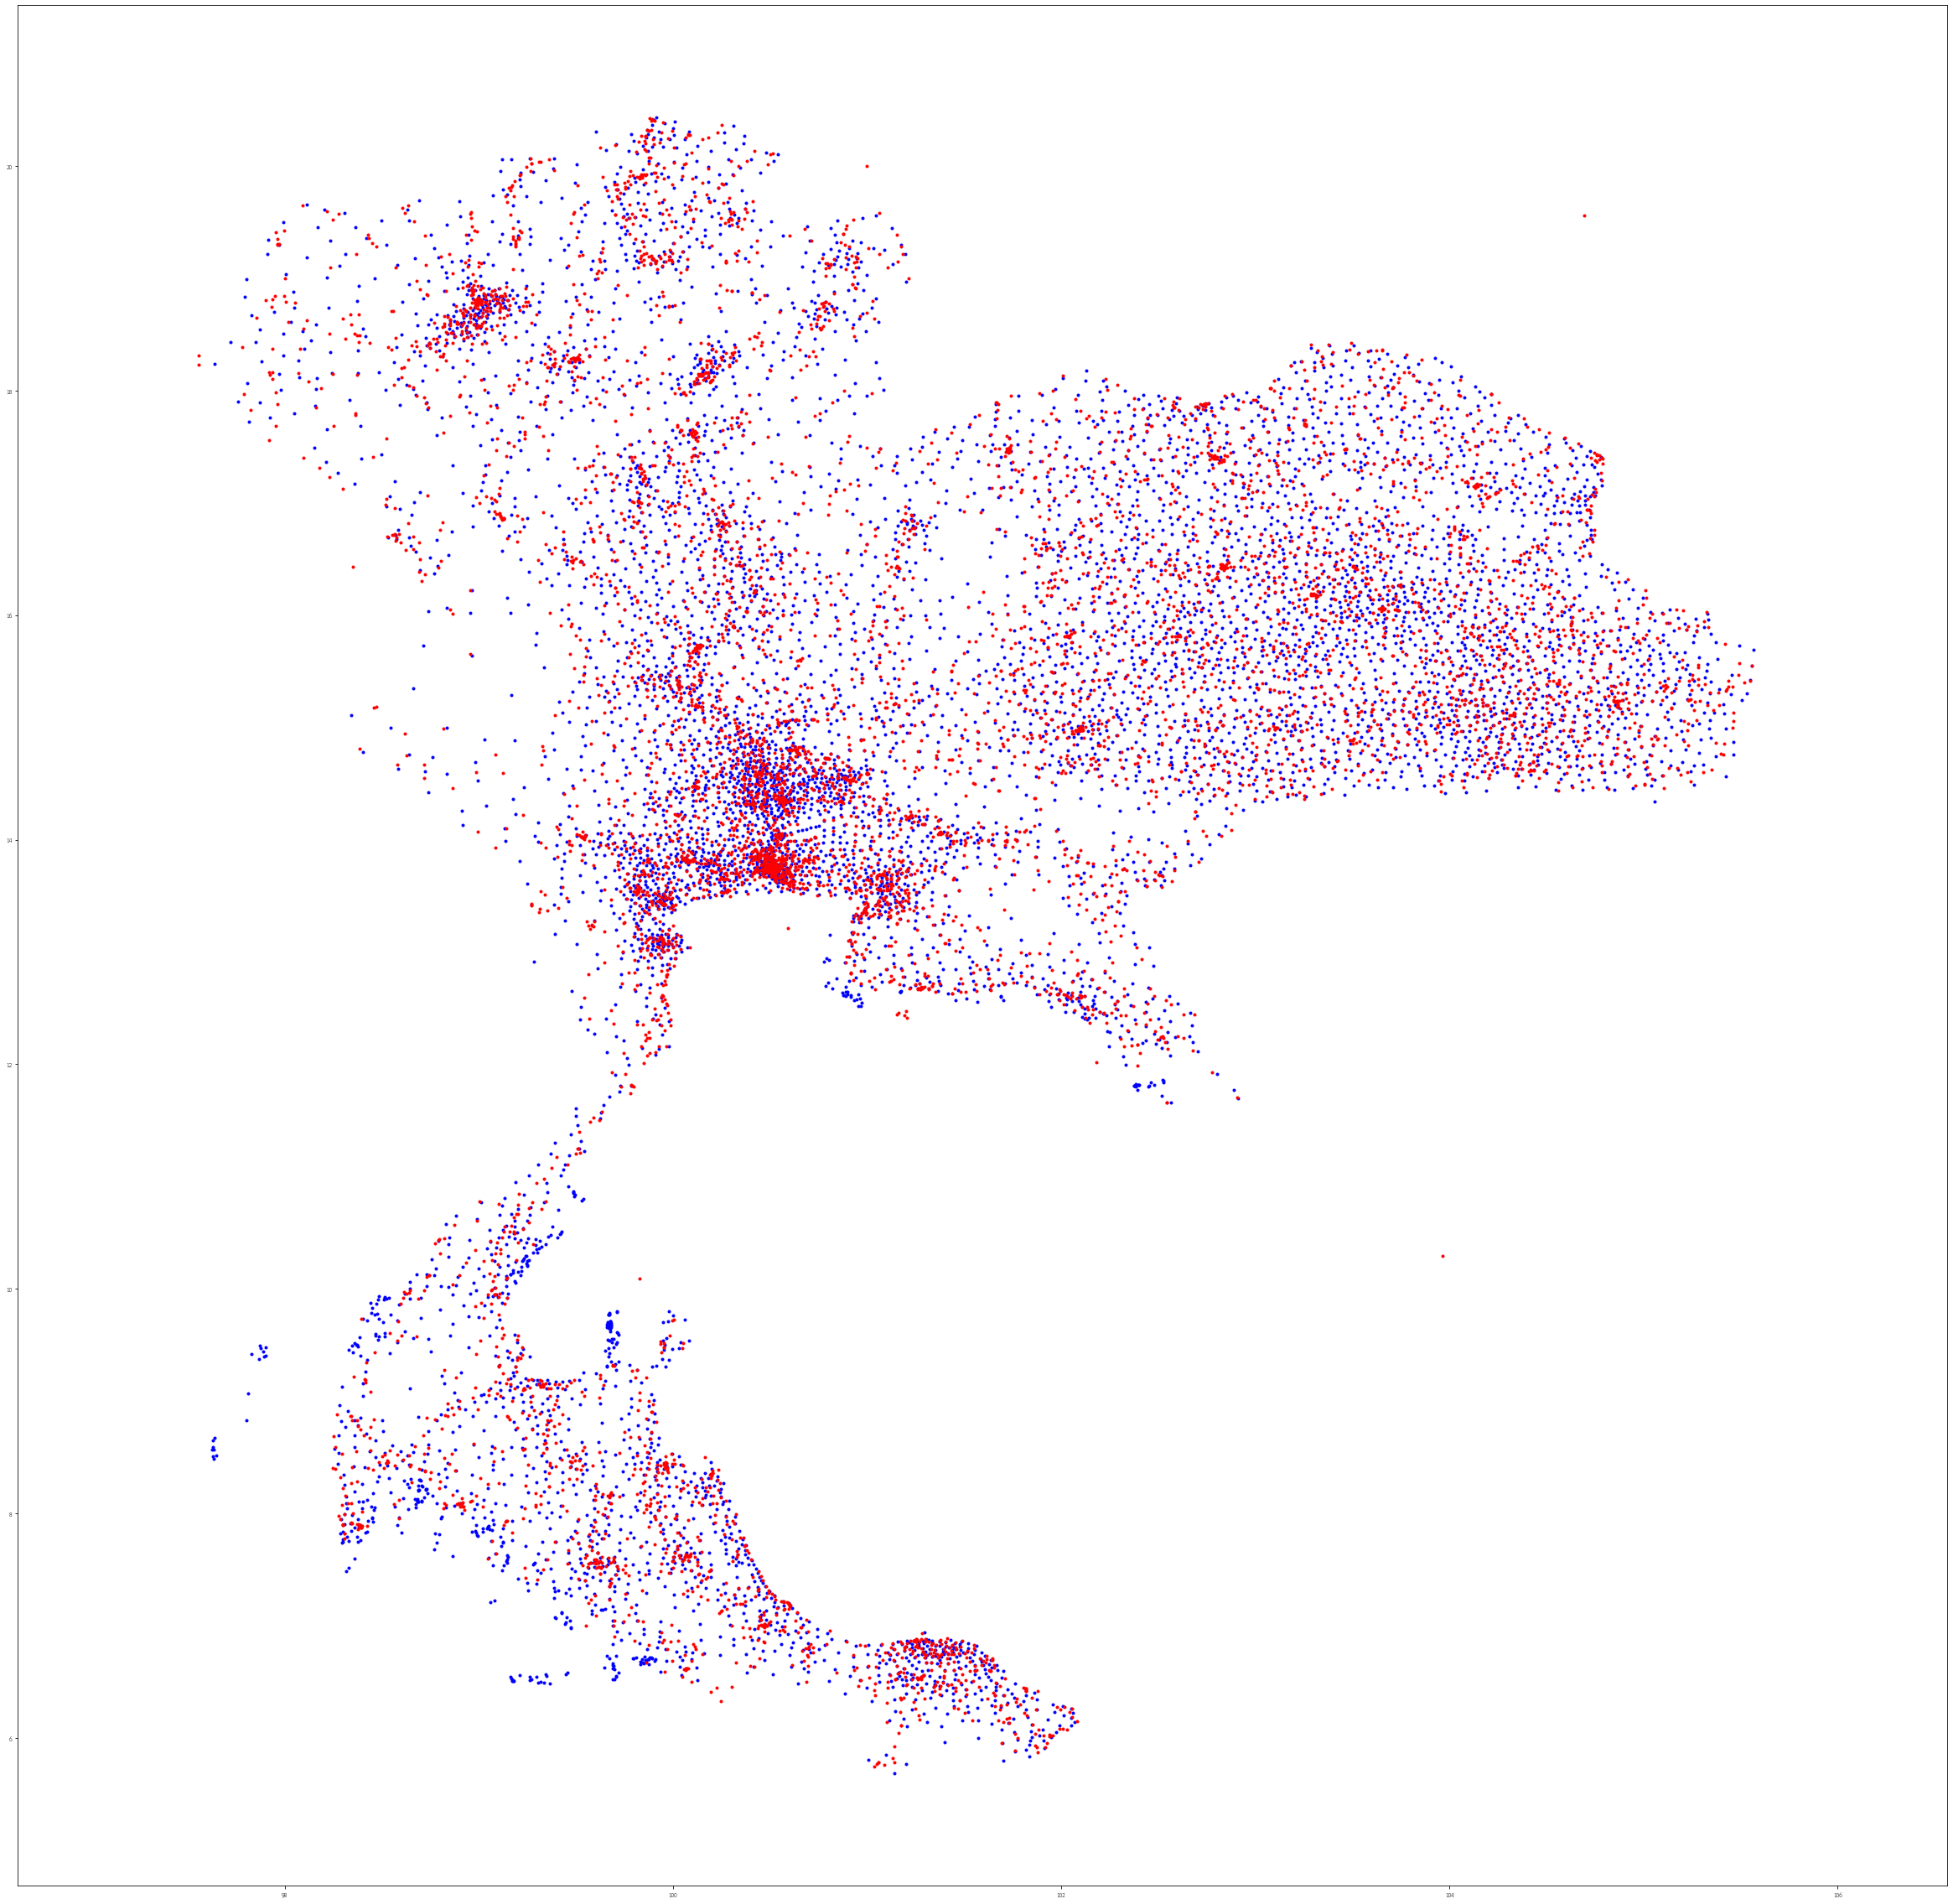

In [ ]:
plt.figure(figsize=(20.625*2,20.625*2))
plt.xlim(97.626-1,105.565+1)
plt.ylim(5.686-1,20.431+1)
plt.plot(position.LONG,position.LAT,"b.")
plt.plot(otherschool.LONG,otherschool.LAT,"r.")

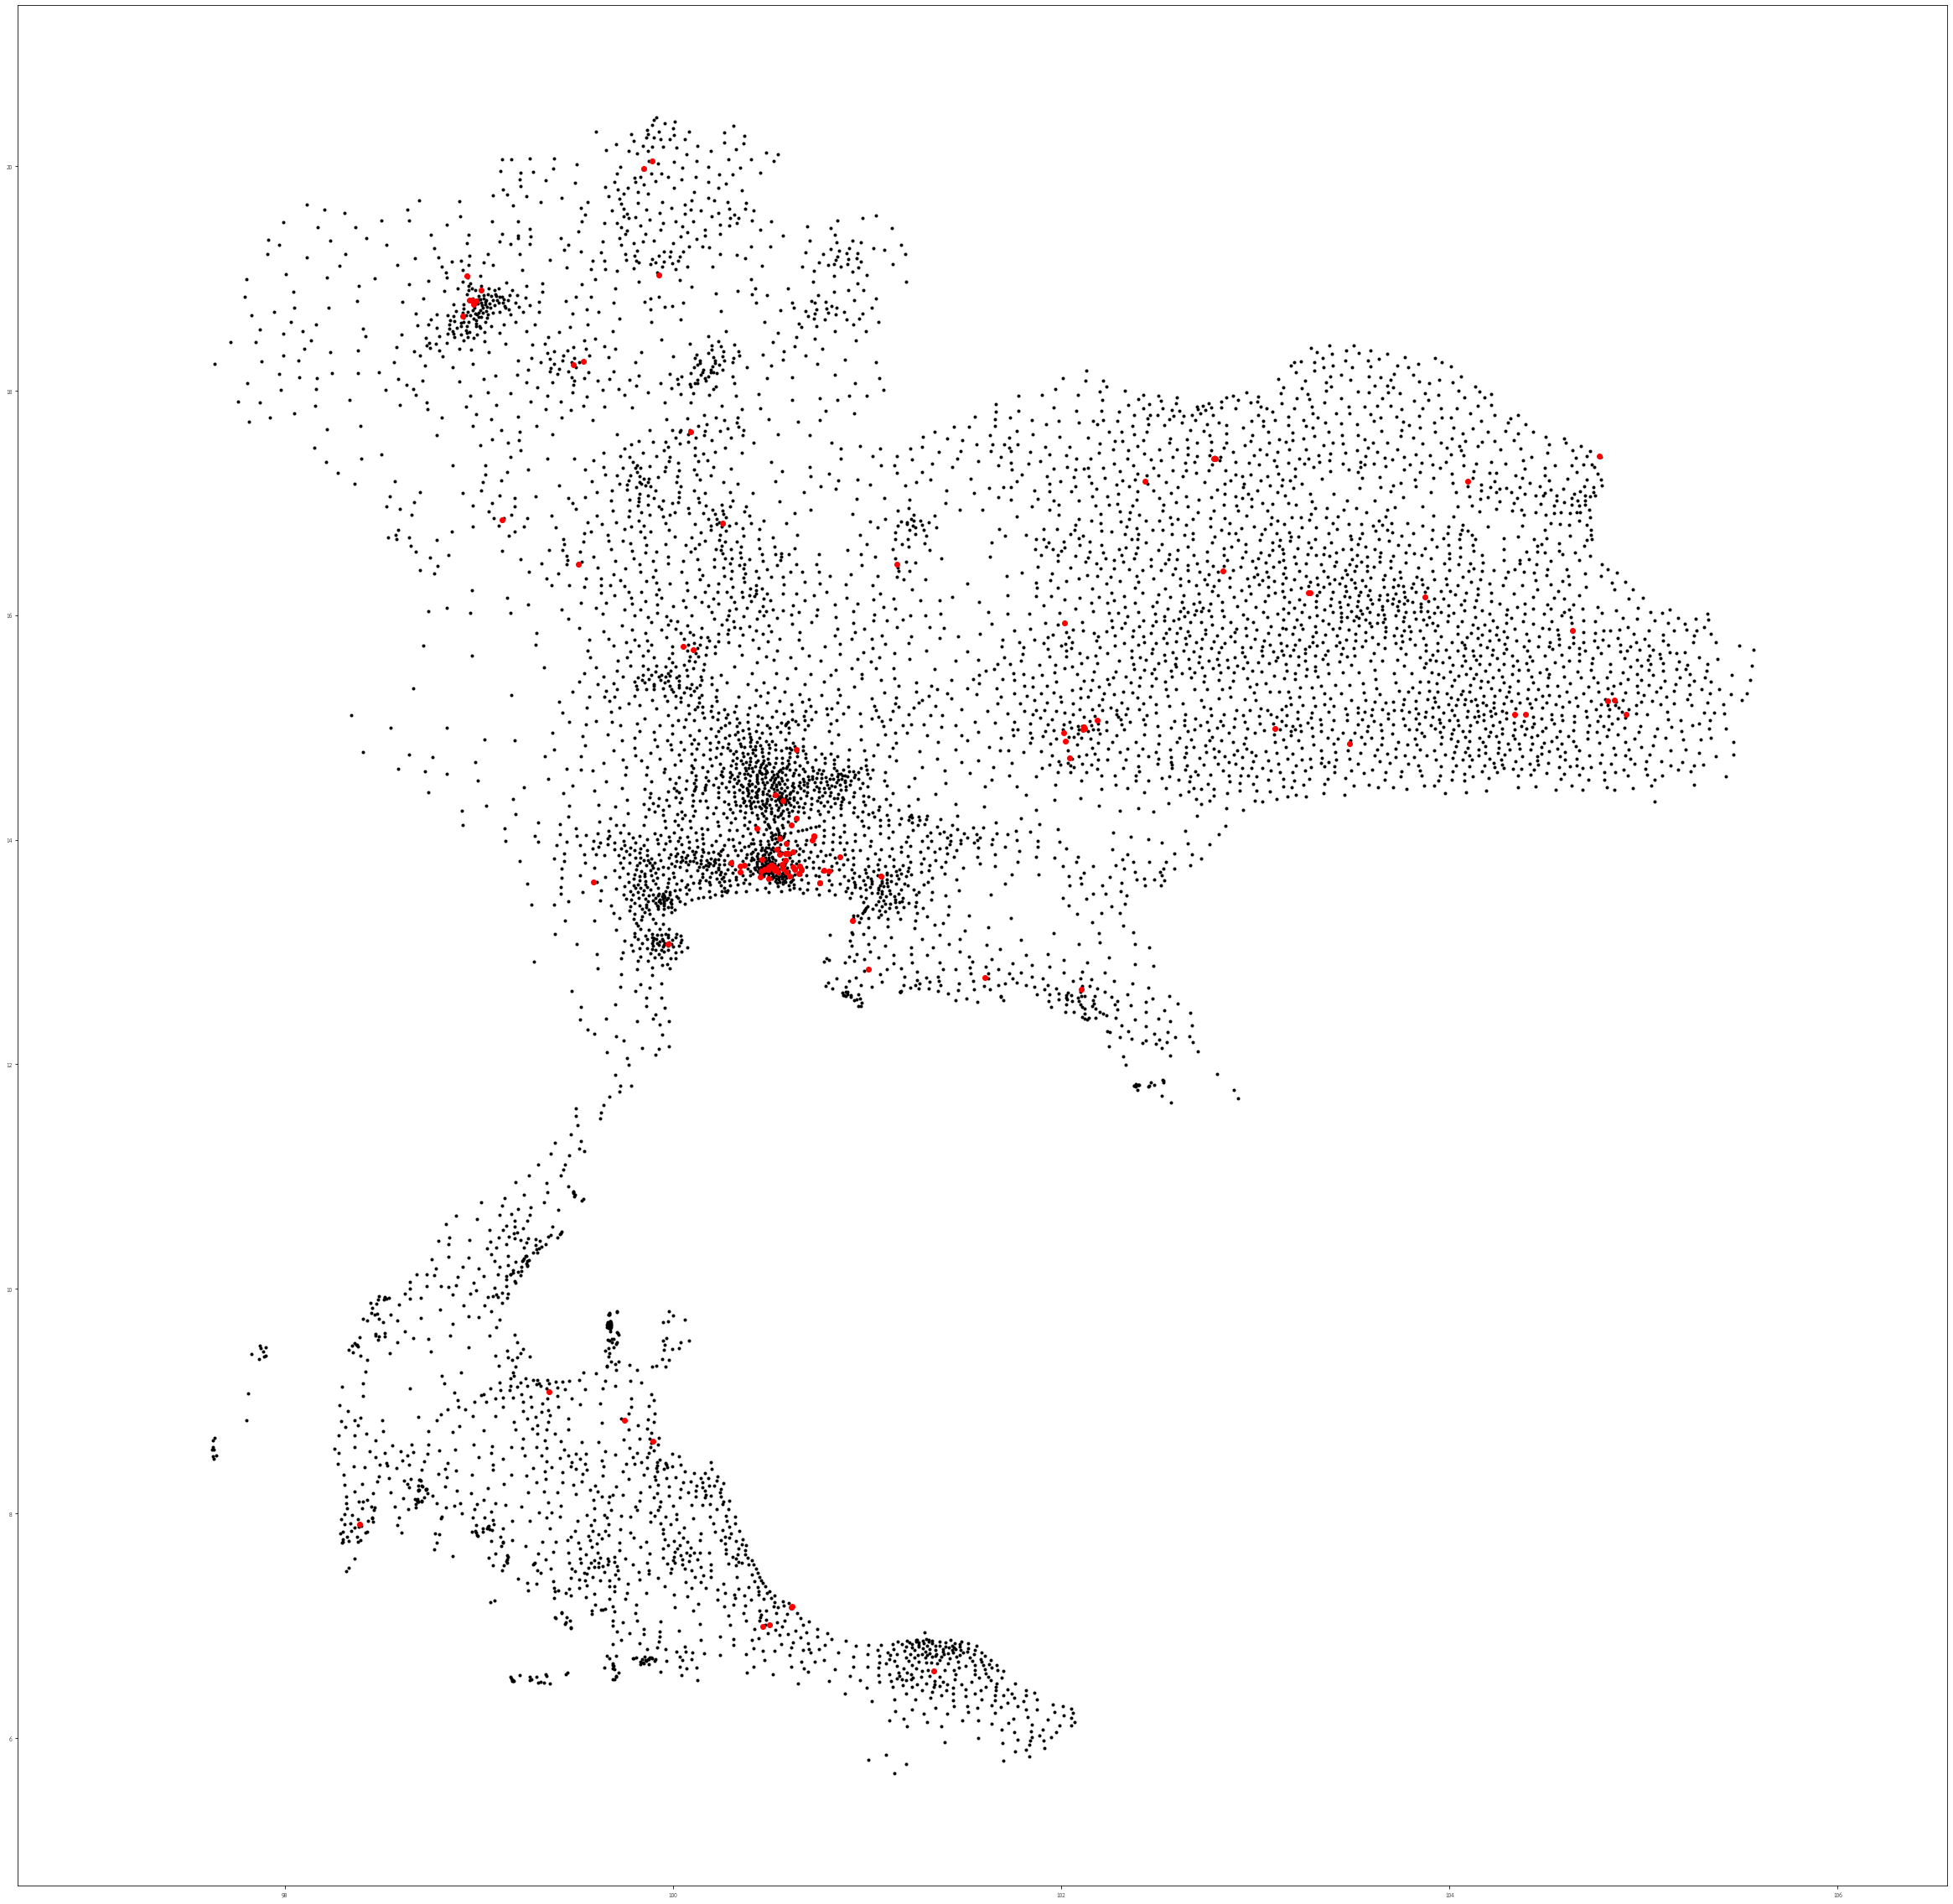

In [ ]:
plt.figure(figsize=(20.625*2,20.625*2))
plt.xlim(97.626-1,105.565+1)
plt.ylim(5.686-1,20.431+1)
plt.plot(position.LONG,position.LAT,"k.")
plt.plot(university.LONG,university.LAT,"ro")
#print(university.Province.value_counts())

In [ ]:
from math import sin, cos, sqrt, atan2, radians
p = np.array(position[["LAT","LONG"]])
s = np.array(school[["LAT","LONG"]])
def caldis(x1,y1,x2,y2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(x1)
    lon1 = radians(y1)
    lat2 = radians(x2)
    lon2 = radians(y2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return(distance)
pos = ()
ls = []
v = []
for i in p:
    c = 100000000000
    for j in s:
        #print(i,j[0]-i[0]/j[1]-i[1])
        k = caldis(i[0],i[1],j[0],j[1])
        if c > k:
            c = k
            pos = j
    ls.append(pos)
    v.append(c)
print(len(ls))

7768


In [ ]:
a = [x[0] for x in ls]
b = [x[1] for x in ls]
position = position.assign(LATNEAR = a)
position = position.assign(LONGNEAR = b)
position = position.assign(DISTANCE = v)
position = position.sort_values(by=["DISTANCE"])
#

In [ ]:
position.head()

,TAMBON_T,AMPHOE_T,CHANGWAT_T,LAT,LONG,LATNEAR,LONGNEAR,DISTANCE
1268,ตำบลบางปะหัน,อ. บางปะหัน,พระนครศรีอยุธยา,14.458,100.558,14.458022,100.558077,0.008626
5351,ตำบลบ้านแท่น,อ. บ้านแท่น,ชัยภูมิ,16.405,102.349,16.405092,102.349142,0.018267
550,ตำบลสวนใหญ่,อ. เมืองนนทบุรี,นนทบุรี,13.842,100.494,13.842148,100.494134,0.021911
5658,ตำบลกุดเสลา,อ. กันทรลักษ์,ศรีสะเกษ,14.679,104.833,14.678850,104.832841,0.023897
1059,ตำบลโคกหล่อ,อ. เมืองตรัง,ตรัง,7.524,99.615,7.523785,99.615008,0.023932


In [ ]:
position.tail()

,TAMBON_T,AMPHOE_T,CHANGWAT_T,LAT,LONG,LATNEAR,LONGNEAR,DISTANCE
335,ตำบลเกาะพระทอง,อ. คุระบุรี,พังงา,8.673,97.638,8.572558,98.231985,66.270524
399,ตำบลเกาะพระทอง,อ. คุระบุรี,พังงา,8.507,97.632,8.572558,98.231985,66.397906
396,ตำบลเกาะพระทอง,อ. คุระบุรี,พังงา,8.486,97.634,8.572558,98.231985,66.478961
387,ตำบลเกาะพระทอง,อ. คุระบุรี,พังงา,8.565,97.626,8.572558,98.231985,66.656488
694,ตำบลเกาะพระทอง,อ. คุระบุรี,พังงา,8.651,97.630,8.572558,98.231985,66.776195


In [ ]:
position.describe()

,LAT,LONG,LATNEAR,LONGNEAR,DISTANCE
count,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000
mean,14.292433,101.277095,14.292977,101.278807,2.026695
std,3.423599,1.785496,3.422819,1.783865,3.546001
min,5.686000,97.626000,5.712584,97.555303,0.008626
25%,13.498750,99.921750,13.498747,99.925001,0.753565
50%,14.981000,100.777500,14.980239,100.777659,1.337643
75%,16.547250,102.684250,16.550703,102.683835,2.177883
max,20.431000,105.565000,20.440831,105.562470,66.776195


In [ ]:
school.describe()

,SchoolName,Province,SchoolType,LAT,LONG
count,35361,35361,35361,35361.0,35361.00
unique,35361,77,28,35223.0,35192.00
top,สตรีวรนาถ,นครราชสีมา,โรงเรียนสังกัด สพฐ. ประเภทสามัญศึกษา,15.0,101.25
freq,1,1547,15814,7.0,4.00


In [ ]:
normalschool.describe()

,SchoolName,Province,SchoolType,LAT,LONG
count,27779,27779,27779,27779.0000,27779.00
unique,27779,77,4,27715.0000,27691.00
top,สตรีวรนาถ,นครราชสีมา,โรงเรียนสังกัด สพฐ. ประเภทสามัญศึกษา,15.9613,101.25
freq,1,1257,15814,4.0000,4.00


In [ ]:
otherschool.describe()

,SchoolName,Province,SchoolType,LAT,LONG
count,7349,7349,7349,7349.000000,7349.000000
unique,7349,77,21,7287.000000,7279.000000
top,นีรชาศึกษาและนีรชาบริหารธุรกิจ,นครราชสีมา,โรงเรียนในสังกัด กศน.,15.383333,100.442612
freq,1,279,5599,5.000000,3.000000


In [ ]:
university.describe()

,SchoolName,Province,SchoolType,LAT,LONG
count,113,113,113,113.000000,113.000000
unique,113,43,2,112.000000,112.000000
top,จุฬาลงกรณ์มหาวิทยาลัย,กรุงเทพมหานคร,สถาบันอุดมศึกษาของรัฐ,14.035843,100.726562
freq,1,34,65,2.000000,2.000000


# Model


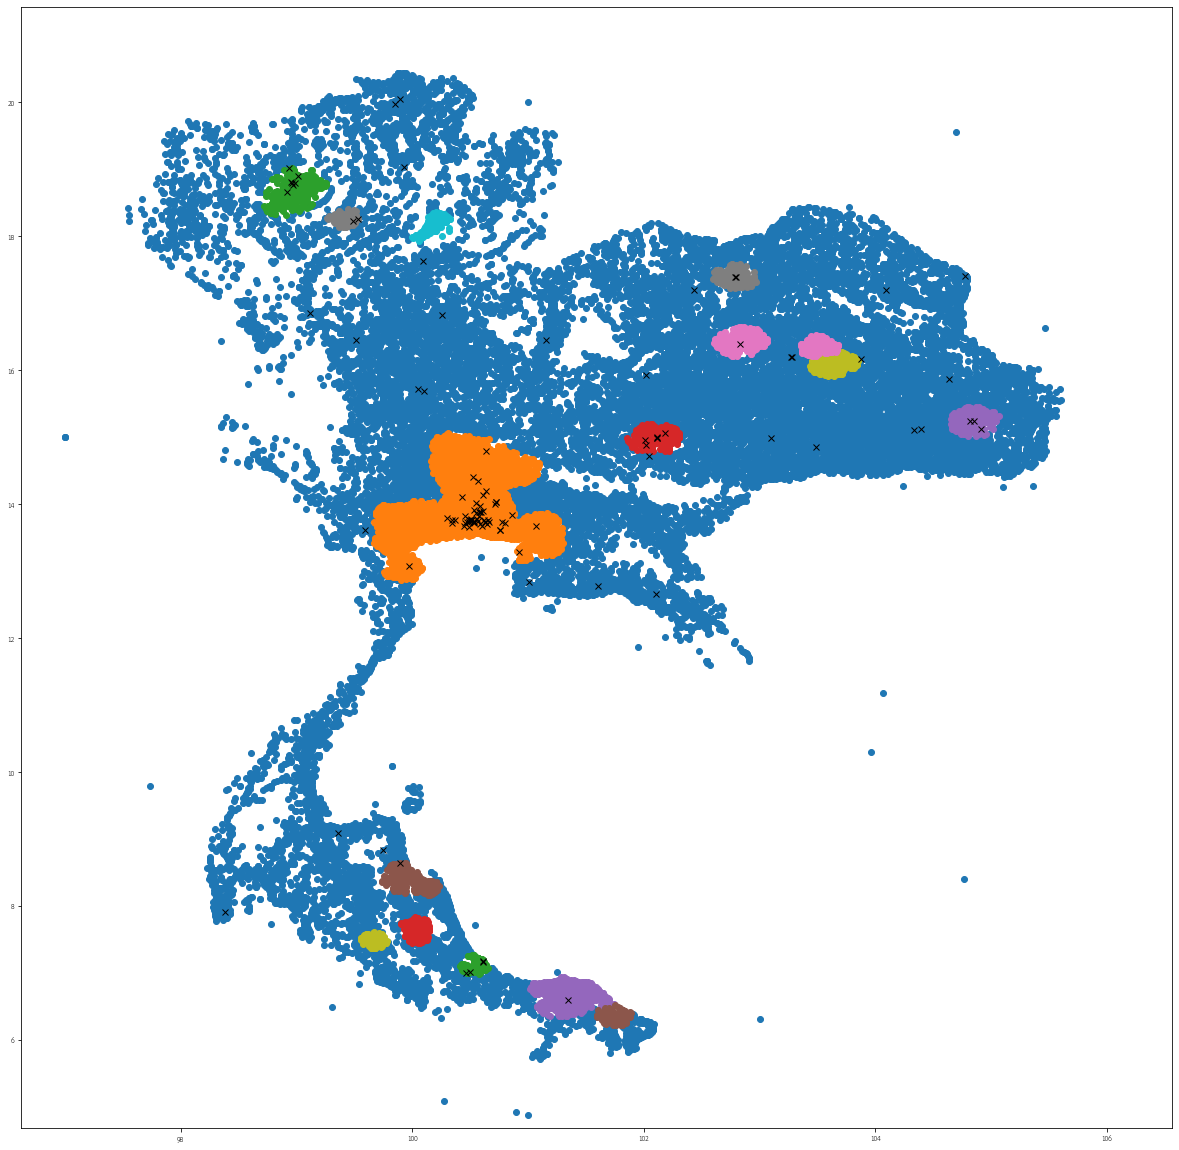

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
X = np.array(school[["LONG","LAT"]])
#print(X)
# define the model
model = DBSCAN(eps=0.12, min_samples=99)
# fit model and predict clusters
yhat = model.fit_predict(X)
#print(yhat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
pyplot.figure(figsize=(20.625,20.625))
pyplot.xlim(97.626-1,105.565+1)
pyplot.ylim(5.686-1,20.431+1)
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.plot(university.LONG,university.LAT,"kx")
pyplot.show()
